<a href="https://colab.research.google.com/github/noh-yujeong/Additional_Contents/blob/main/RECYCLING_BOT_Creating_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/noh-yujeong/ICTproject-RecyclingBot.git

Cloning into 'ICTproject-RecyclingBot'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 4.0 MB 57.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
!pip install torchvision fastai==0.6

     |████████████████████████████████| 429 kB 39.4 MB/s 
     |████████████████████████████████| 3.7 MB 61.0 MB/s 
     |████████████████████████████████| 1.5 MB 71.9 MB/s 
     |████████████████████████████████| 20.9 MB 1.2 MB/s 
     |████████████████████████████████| 112 kB 70.3 MB/s 
     |████████████████████████████████| 7.7 MB 56.6 MB/s 
     |████████████████████████████████| 79 kB 9.8 MB/s 
     |████████████████████████████████| 547 kB 70.0 MB/s 
     |████████████████████████████████| 138 kB 70.7 MB/s 
     |████████████████████████████████| 861 kB 49.7 MB/s 
     |████████████████████████████████| 479 kB 64.5 MB/s 
     |████████████████████████████████| 74 kB 4.1 MB/s 
     |████████████████████████████████| 4.2 MB 62.2 MB/s 
     |████████████████████████████████| 141 kB 70.4 MB/s 
     |████████████████████████████████| 49 kB 7.8 MB/s 
     |████████████████████████████████| 111 kB 74.1 MB/s 
     |████████████████████████████████| 127 kB 68.6 MB/s 
     |██████████████

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset-resized.zip to dataset-resized.zip


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix
from fastai.model import * 
import random
import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import tensorflow

In [ ]:
files = zf.ZipFile("dataset-resized.zip",'r')
files.extractall()
files.close()

os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['plastic', 'paper', 'trash', 'cardboard', 'glass', 'metal', '.DS_Store']

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,time
0,1.602718,0.656912,0.246032,00:35
1,1.017117,0.479371,0.169841,00:35
2,0.896847,0.583914,0.188889,00:36
3,0.778764,0.631007,0.174603,00:35
4,0.913125,0.525949,0.182540,00:35
5,0.864560,0.504927,0.160317,00:36
6,0.767415,0.568818,0.177778,00:35
7,0.648778,0.679386,0.223810,00:35
8,0.637516,0.546579,0.180952,00:35
9,0.586512,0.354856,0.131746,00:35


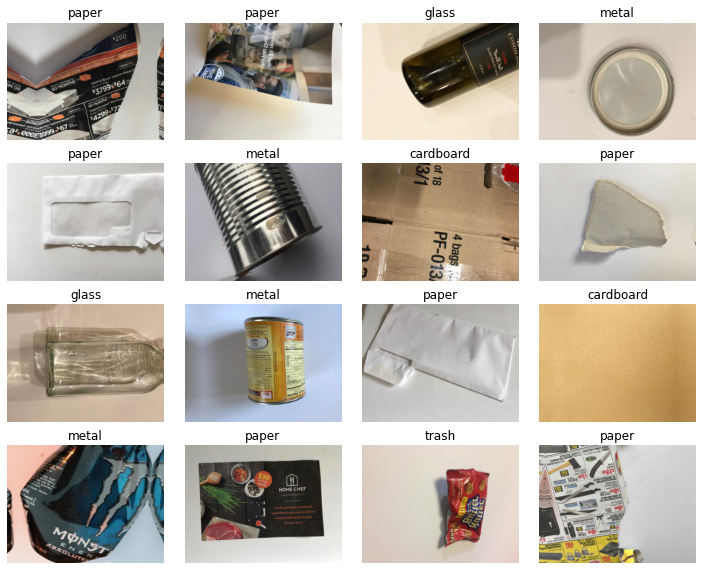

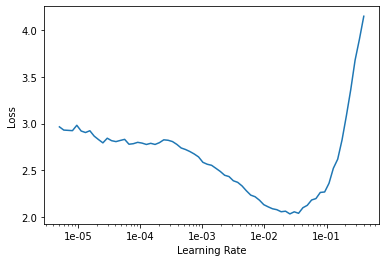

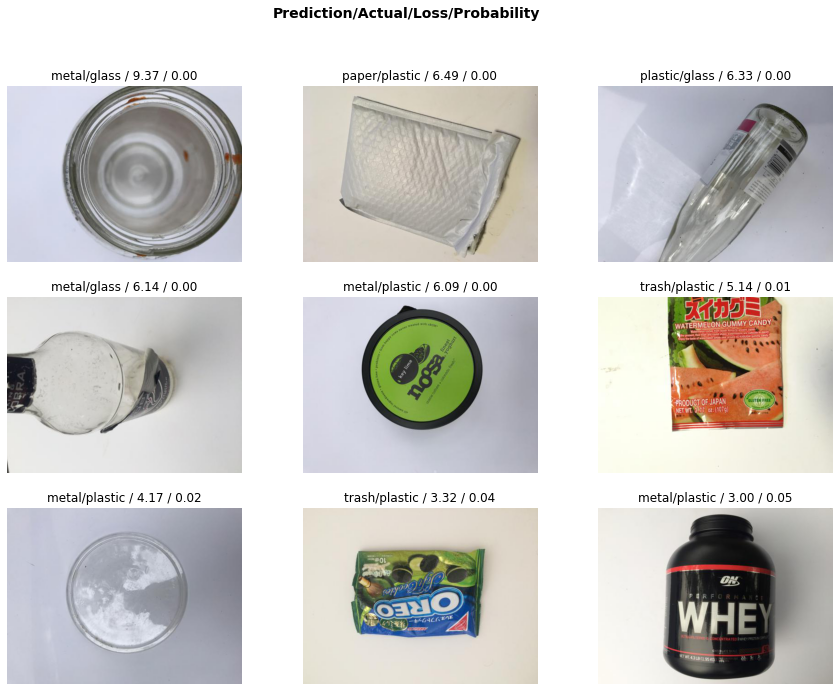

In [ ]:
def split_indices(folder,seed1,seed2):
    n=len(os.listdir(folder))
    #os.listdir()은 지정한 디렉토리 내 모든 파일과 디렉토리의 list를 리턴함
    full_set=list(range(1,n+1))
    ### full_set은 list내 모든 data를 저장한 변수임

    #train indices
    random.seed(seed1)
    #seed1개 만큼 난수 생성
    train=random.sample(list(range(1,n+1)),int(.5*n))
    remain=list(set(full_set)-set(train))
    random.seed(seed2)
    valid=random.sample(remain,int(.5*len(remain)))
    test=list(set(remain)-set(valid))
    return (train, valid, test)

def get_names(waste_type,indices):
    file_names=[waste_type+str(i)+".jpg" for i in indices]
    return (file_names)


def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

subsets=['train','valid']
waste_types=['cardboard','glass','metal','paper','plastic','trash']

for subset in subsets:
    for waste_type in waste_types:
        folder=os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)

if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))

for waste_type in waste_types:
    source_folder=os.path.join('dataset-resized',waste_type)
    train_ind,valid_ind,test_ind=split_indices(source_folder,1,1)

    ##source 파일을 train(학습) 데이터로 옮기기?(만들기)
    train_names=get_names(waste_type,train_ind)
    train_source_files=[os.path.join(source_folder,name)for name in train_names]
    train_dest="data/train/"+waste_type
    move_files(train_source_files,train_dest)

    ##source 파일을 검증 데이터로 만들기
    valid_names=get_names(waste_type,valid_ind)
    valid_source_files=[os.path.join(source_folder,name) for name in valid_names]
    valid_dest="data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)

    ##source 파일을 테스트 데이터로 만들기
    test_names=get_names(waste_type,test_ind)
    test_source_files=[os.path.join(source_folder,name) for name in test_names]

    ##I use data/test here because the images can be mixed up(?)
    move_files(test_source_files,"data/test")


path=Path(os.getcwd())/"data"

tfms=get_transforms(do_flip=True,flip_vert=True)
data=ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)


print(data.classes)
#data가 어떻게 보일지에 대한 예제를 먼저 확인
data.show_batch(rows=4,figsize=(10,8))

########################3.모델 훈련########################
learn=create_cnn(data,models.resnet34,metrics=error_rate)

learn.model
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

###training#####
learn.fit_one_cycle(20,max_lr=5.13e-03)

###visualizing most incorrect images
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()

interp.plot_top_losses(9,figsize=(15,11))

#doc(interp.plot_top_losses)
#interp.plot_confusion_matrix(figsize=(12,12),dpi=60)
#interp.most_confused(min_val=2)


torch.Size([635, 6])
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'plastic', 'plastic', 'paper', 'metal', 'cardboard', 'metal', 'paper', 'paper', 'cardboard', 'plastic', 'glass', 'paper', 'paper', 'paper', 'plastic', 'trash', 'glass', 'metal', 'metal', 'metal', 'cardboard', 'metal', 'glass', 'metal', 'cardboard', 'plastic', 'glass', 'metal', 'glass', 'plastic', 'glass', 'cardboard', 'paper', 'cardboard', 'glass', 'paper', 'glass', 'glass', 'cardboard', 'trash', 'cardboard', 'glass', 'metal', 'cardboard', 'trash', 'trash', 'cardboard', 'glass', 'glass', 'plastic', 'paper', 'plastic', 'metal', 'paper', 'trash', 'paper', 'cardboard', 'glass', 'paper', 'metal', 'cardboard', 'metal', 'glass', 'plastic', 'plastic', 'metal', 'trash', 'paper', 'metal', 'plastic', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'cardboard', 'trash', 'metal', 'glass', 'plastic', 'paper', 'metal', 'paper', 'cardboard', 'metal', 'paper', 'paper', 'plastic', 'plastic', 'trash', 'gla

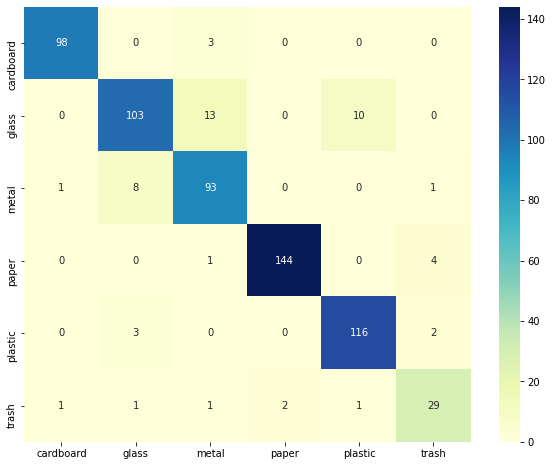

In [ ]:

#############################4.테스트 데이터로 새로운 예측 만들기##########

preds=learn.get_preds(ds_type=DatasetType.Test)

print(preds[0].shape)
preds[0]

print(data.classes)

max_idxs=np.asarray(np.argmax(preds[0],axis=1))

yhat=[]
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])
print(yhat)

learn.data.test_ds[0][0]

y=[]

for label_path in data.test_ds.items:
    y.append(str(label_path))

pattern = re.compile("([a-z]+)[0-9]+")
#pattern = re.compile("[A-Za-z0-9]+")
for i in range(len(y)):
  y[i] = pattern.search(y[i]).group(1)

#predicted values
print(yhat[0:5])

#actual values
print(y[0:5])

learn.data.test_ds[0][0]

cm=confusion_matrix(y,yhat)
print(cm)

df_cm=pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))


sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")


correct=0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct+=cm[r,c]

accuracy=correct/sum(sum(cm))
print(accuracy)
# 경로 지정
PATH = "state_dict_model.pt"

# 저장하기
torch.save(net.state_dict(), PATH)

# 불러오기
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()